In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,697 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

Text(0.3, 0.3, '한글')

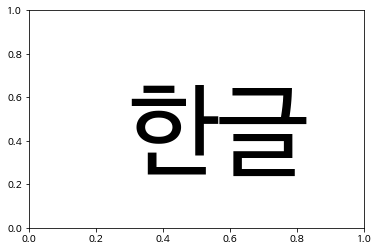

In [1]:
# 나눔 폰트 테스트
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.text(0.3, 0.3, '한글', size=100)

# 데이터 준비

In [2]:
# 파일 업로드
from google.colab import files
myfile = files.upload()

Saving daegu_temperature_202209.csv to daegu_temperature_202209.csv


In [3]:
import pandas as pd

df = pd.read_csv('daegu_temperature_202209.csv', encoding='cp949')

# 칼럼명에서 공백 및 특수문자 제거
col_list = ['지점', '지점명', '일시', '평균기온', 
            '최저기온', '최고기온', '일강수량', '평균상대습도', 
            '합계일조시간', '평균전운량']

df.columns = col_list
df.head(5)

,지점,지점명,일시,평균기온,최저기온,최고기온,일강수량,평균상대습도,합계일조시간,평균전운량
0,143,대구,2022-09-01,21.6,18.5,25.2,NaN,88.4,3.1,8.1
1,143,대구,2022-09-02,21.5,18.8,24.2,0.3,91.1,0.0,9.6
2,143,대구,2022-09-03,22.2,20.4,24.3,0.1,91.9,0.0,9.8
3,143,대구,2022-09-04,25.4,20.9,29.9,0.4,89.5,4.4,8.9
4,143,대구,2022-09-05,24.9,22.0,27.9,31.7,96.0,0.0,9.6


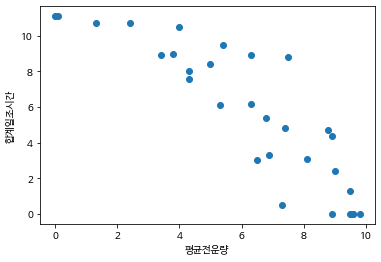

In [4]:
# 데이터 분포 시각화
import matplotlib.pyplot as plt

plt.scatter(df['평균전운량'], df['합계일조시간'])
plt.xlabel('평균전운량')
plt.ylabel('합계일조시간')
plt.show()

# 단순회귀분석

In [5]:
# 회귀분석
from statsmodels.formula.api import ols

model = ols('합계일조시간 ~ 평균전운량', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 합계일조시간   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     90.95
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.71e-10
Time:                        01:06:26   Log-Likelihood:                -61.368
No. Observations:                  30   AIC:                             126.7
Df Residuals:                      28   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0279      0.854     15.253      0.000      11.278      14.777
평균전운량         -1.1959      0.125     -9.537      0.000      -1.453      -0.939
==============================================================================
Omnibus:                        1.732   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.140
Skew:                           0.478   Prob(JB):                        0.565
Kurtosis:                       2.994   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 예측(추정)값
model.fittedvalues

0      3.341137
1      1.547298
2      1.308120
3      2.384423
4      1.547298
5      6.689637
6     10.157726
7      8.244297
8      6.570047
9      4.297851
10     5.493744
11     2.384423
12     2.504012
13     4.058673
14     5.493744
15     5.254566
16     4.178262
17     1.666887
18     4.895798
19     7.885529
20    11.473208
21     7.048405
22     8.961833
23     7.885529
24     2.264834
25     1.666887
26     8.483476
27     4.776208
28    13.027868
29    12.908279
dtype: float64

In [7]:
# 잔차
model.resid

0    -0.241137
1    -1.547298
2    -1.308120
3     2.015577
4    -1.547298
5    -0.589637
6     0.542274
7     2.255703
8     2.929953
9    -3.797851
10    0.706256
11   -2.384423
12    2.195988
13    4.741327
14    3.406256
15   -2.254566
16    0.621738
17   -0.366887
18    0.504202
19   -0.285529
20   -0.773208
21    1.351595
22   -0.061833
23    0.114471
24    0.135166
25   -1.666887
26    0.516524
27   -1.476208
28   -1.927868
29   -1.808279
dtype: float64

In [8]:
# 예측값
model.predict(exog=dict(평균전운량=[8.1]))

0    3.341137
dtype: float64

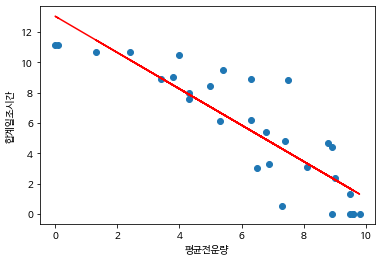

In [9]:
# 회귀 직선 시각화
plt.scatter(df['평균전운량'], df['합계일조시간'])
plt.plot(df['평균전운량'], model.fittedvalues, color='red')
plt.xlabel('평균전운량')
plt.ylabel('합계일조시간')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


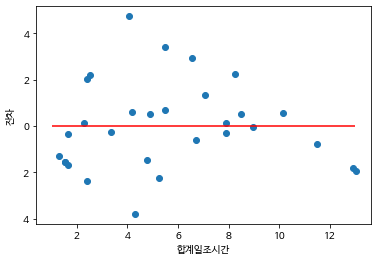

In [10]:
# 잔차도
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('합계일조시간')
plt.ylabel('잔차')
plt.hlines(y=0, xmin=1, xmax=13, color='red')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

x = df['평균전운량'].values.reshape(-1, 1)
y = df['합계일조시간']
 
model = LinearRegression().fit(x, y)

In [12]:
# 절편
model.intercept_

13.027868119586476

In [13]:
# 계수
model.coef_

array([-1.19589271])

In [14]:
# 예측값
model.predict([[8.1]])

array([3.34113719])

# 로지스틱 회귀분석

In [15]:
# 학습 데이터
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [16]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x, y)

LogisticRegression()

In [17]:
# 클래스
logistic_model.classes_

array([0, 1])

In [18]:
# 절편
logistic_model.intercept_

array([-3.11532126])

In [19]:
# 계수
logistic_model.coef_

array([[0.89657723]])

In [20]:
# 각 클래스에 대한 확률
logistic_model.predict_proba(x)

array([[0.95752033, 0.04247967],
       [0.90192015, 0.09807985],
       [0.78954198, 0.21045802],
       [0.60482001, 0.39517999],
       [0.38438251, 0.61561749],
       [0.20301356, 0.79698644],
       [0.09413656, 0.90586344],
       [0.04067098, 0.95932902],
       [0.01700166, 0.98299834],
       [0.00700658, 0.99299342]])

In [21]:
# 예측
logistic_model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

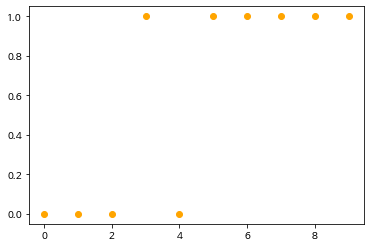

In [22]:
import matplotlib.pyplot as plt

# x, y 점 그리기
plt.scatter(x.ravel(), y, color="orange")
plt.show()

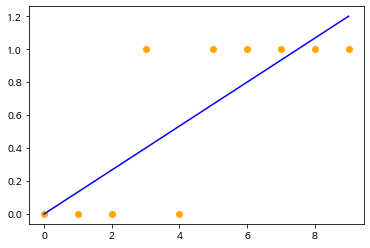

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x, y 점 그리기
plt.scatter(x.ravel(), y, color="orange")

# 선형회귀 선 그리기
linear_model = LinearRegression()
linear_model.fit(x, y)

plt.plot(x, 
         linear_model.coef_ * x + linear_model.intercept_,
         label="Linear Regression Model",
         color="blue")
plt.show()

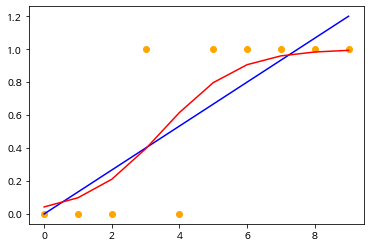

In [24]:
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.linear_model import LinearRegression

# x, y 점 그리기
plt.scatter(x.ravel(), y, color="orange")

# 선형회귀 선 그리기
linear_model = LinearRegression()
linear_model.fit(x, y)

plt.plot(x, 
         linear_model.coef_ * x + linear_model.intercept_,
         label="Linear Regression Model",
         color="blue")

# 로지스틱 회귀 선 그리기
loss = expit(x * logistic_model.coef_ + logistic_model.intercept_).ravel()
plt.plot(x,
         loss, 
         label="Logistic Regression Model",
         color="red")
plt.show()

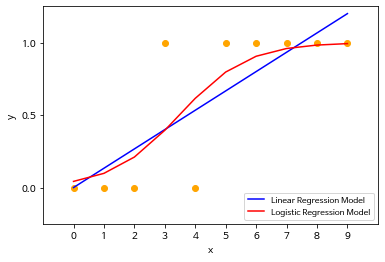

In [25]:
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.linear_model import LinearRegression

# x, y 점 그리기
plt.scatter(x.ravel(), y, color="orange")

# 선형회귀 선 그리기
linear_model = LinearRegression()
linear_model.fit(x, y)

plt.plot(x, 
         linear_model.coef_ * x + linear_model.intercept_,
         label="Linear Regression Model",
         color="blue")

# 로지스틱 회귀 선 그리기
loss = expit(x * logistic_model.coef_ + logistic_model.intercept_).ravel()
plt.plot(x,
         loss, 
         label="Logistic Regression Model",
         color="red")

plt.ylabel("y")
plt.xlabel("x")
plt.xticks(range(0, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-1, 10)
plt.legend(loc="lower right", fontsize="small")

plt.show()

In [26]:
# 정확도
logistic_model.score(x, y)

0.8

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y, logistic_model.predict(x))
cm

array([[3, 1],
       [1, 5]])

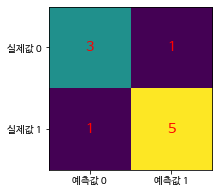

In [28]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('예측값 0', '예측값 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('실제값 0', '실제값 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
                color='red', size='x-large')
plt.show()

In [29]:
# 성과지표 출력
print(classification_report(y, logistic_model.predict(x)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [30]:
# 학습 데이터
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [31]:
import statsmodels.api as sm

x = sm.add_constant(x)
x

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [32]:
model = sm.Logit(y, x)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.250690
         Iterations 8


In [33]:
result.params

array([-4.5291637,  1.2954371])

In [34]:
result.predict(x)

array([0.01067452, 0.03791607, 0.12583589, 0.34460203, 0.65759268,
       0.87523078, 0.96243735, 0.98942777, 0.99708316, 0.99919974])

In [35]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [36]:
result.pred_table()

array([[3., 1.],
       [1., 5.]])

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.6275
Time:                        01:18:59   Log-Likelihood:                -2.5069
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                  0.003658
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5292      3.186     -1.422      0.155     -10.773       1.714
x1             1.2954      0.845      1.533      0.125      -0.361       2.952
==============================================================================
"""

# 성능 평가

In [38]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

x = df['평균전운량'].values.reshape(-1, 1)
y = df['합계일조시간']

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [39]:
x_train

array([[8.9],
       [4.3],
       [6.3],
       [7.5],
       [3.4],
       [9. ],
       [8.1],
       [9.8],
       [6.9],
       [3.8],
       [6.8],
       [5.3],
       [7.4],
       [9.5],
       [8.9],
       [7.3],
       [9.5],
       [0.1],
       [1.3],
       [8.8],
       [5. ],
       [2.4],
       [4.3],
       [6.5]])

In [40]:
# 선형회귀분석 모델 생성
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [41]:
# 예측값
y_pred = linear_model.predict(x_test)
y_pred

array([ 8.1291699 ,  5.45766031,  1.62462481,  1.62462481, 12.77527353,
        6.50303363])

In [42]:
# 관측값
y_test.values

array([10.5,  6.2,  0. ,  0. , 11.1,  9.5])

In [43]:
# 평균절대오차(Mean Absolute Error, MAE)
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

1.839109886484221

In [44]:
# 평균제곱오차(Mean Squared Error, MSE)
from sklearn.metrics import mean_squared_error 

mean_squared_error(y_test, y_pred)

3.873177330937672

In [45]:
# 평균제곱근오차(Root Mean Squared Error, RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred) 
np.sqrt(mse)

1.9680389556453581

In [46]:
# 결정계수(R2 Score)
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8216061924569079

In [47]:
# 결정계수(R2 Score)
linear_model.score(x_test, y_test)

0.8216061924569079

In [48]:
# 데이터 준비 및 선형회귀분석 모델 생성
from sklearn.linear_model import LinearRegression

x = df['평균전운량'].values.reshape(-1, 1)
y = df['합계일조시간']

linear_model = LinearRegression()

In [49]:
# K 분할 교차 검증법
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5)
n_iter = 0

for train_index, test_index in kf.split(x):  
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linear_model.fit(x_train, y_train)    
    pred = linear_model.predict(x_test)
    n_iter += 1

    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n#{0} 훈련 데이터 크기 : {1}'.format(n_iter, train_size))
    print('#{0} 검증 데이터 크기 : {1}'.format(n_iter, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    print('#{0} 예측값 : {1}'.format(n_iter,pred))
    print('#{0} 관측값 : {1}'.format(n_iter,y_test.values))


#1 훈련 데이터 크기 : 24
#1 검증 데이터 크기 : 6
#1 검증 세트 인덱스 : [0 1 2 3 4 5]
#1 예측값 : [3.63339657 1.93494223 1.70848166 2.72755426 1.93494223 6.80384465]
#1 관측값 : [3.1 0.  0.  4.4 0.  6.1]

#2 훈련 데이터 크기 : 24
#2 검증 데이터 크기 : 6
#2 검증 세트 인덱스 : [ 6  7  8  9 10 11]
#2 예측값 : [9.77456922 8.01321473 6.47202954 4.38042108 5.48126764 2.61906658]
#2 관측값 : [10.7 10.5  9.5  0.5  6.2  0. ]

#3 훈련 데이터 크기 : 24
#3 검증 데이터 크기 : 6
#3 검증 세트 인덱스 : [12 13 14 15 16 17]
#3 예측값 : [1.9608869  3.6012005  5.11533614 4.8629802  3.72737847 1.07764111]
#3 관측값 : [4.7 8.8 8.9 3.  4.8 1.3]

#4 훈련 데이터 크기 : 24
#4 검증 데이터 크기 : 6
#4 검증 세트 인덱스 : [18 19 20 21 22 23]
#4 예측값 : [ 4.85912383  7.88198043 11.50940834  7.03558058  8.9702088   7.88198043]
#4 관측값 : [ 5.4  7.6 10.7  8.4  8.9  8. ]

#5 훈련 데이터 크기 : 24
#5 검증 데이터 크기 : 6
#5 검증 세트 인덱스 : [24 25 26 27 28 29]
#5 예측값 : [ 2.20237898  1.53928535  9.09855273  4.98737222 14.13806431 14.00544559]
#5 관측값 : [ 2.4  0.   9.   3.3 11.1 11.1]


In [50]:
# K 분할 교차 검증법(평가포함)
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kf.split(x):  
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linear_model.fit(x_train, y_train)
    pred = linear_model.predict(x_test)
    n_iter += 1
        
    accuracy = linear_model.score(x_test, y_test)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1}'.format(n_iter, accuracy))
    print('#{0} 훈련 데이터 크기 : {1}'.format(n_iter, train_size))
    print('#{0} 검증 데이터 크기 : {1}'.format(n_iter, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    print('#{0} 예측값 : {1}'.format(n_iter,pred))
    print('#{0} 관측값 : {1}'.format(n_iter,y_test.values))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.6044532406967607
#1 훈련 데이터 크기 : 24
#1 검증 데이터 크기 : 6
#1 검증 세트 인덱스 : [0 1 2 3 4 5]
#1 예측값 : [3.63339657 1.93494223 1.70848166 2.72755426 1.93494223 6.80384465]
#1 관측값 : [3.1 0.  0.  4.4 0.  6.1]

#2 교차 검증 정확도 : 0.6794540571015275
#2 훈련 데이터 크기 : 24
#2 검증 데이터 크기 : 6
#2 검증 세트 인덱스 : [ 6  7  8  9 10 11]
#2 예측값 : [9.77456922 8.01321473 6.47202954 4.38042108 5.48126764 2.61906658]
#2 관측값 : [10.7 10.5  9.5  0.5  6.2  0. ]

#3 교차 검증 정확도 : -0.13652389792741038
#3 훈련 데이터 크기 : 24
#3 검증 데이터 크기 : 6
#3 검증 세트 인덱스 : [12 13 14 15 16 17]
#3 예측값 : [1.9608869  3.6012005  5.11533614 4.8629802  3.72737847 1.07764111]
#3 관측값 : [4.7 8.8 8.9 3.  4.8 1.3]

#4 교차 검증 정확도 : 0.8063254814043341
#4 훈련 데이터 크기 : 24
#4 검증 데이터 크기 : 6
#4 검증 세트 인덱스 : [18 19 20 21 22 23]
#4 예측값 : [ 4.85912383  7.88198043 11.50940834  7.03558058  8.9702088   7.88198043]
#4 관측값 : [ 5.4  7.6 10.7  8.4  8.9  8. ]

#5 교차 검증 정확도 : 0.8041845738804079
#5 훈련 데이터 크기 : 24
#5 검증 데이터 크기 : 6
#5 검증 세트 인덱스 : [24 25 26 27 28 29]
#5 예측값 : [ 2.

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_model, x, y, cv=5)
scores

array([ 0.60445324,  0.67945406, -0.1365239 ,  0.80632548,  0.80418457])